In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_excel(r'C:\Users\User\Downloads\sebokeng_data spreadsheet.xlsx')

In [3]:
dataset.head()

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sebSO2   1925 non-null   float64
 1   sebNO2   2055 non-null   float64
 2   sebO3    2371 non-null   float64
 3   sebPM25  1853 non-null   float64
 4   sebPM10  1827 non-null   float64
dtypes: float64(5)
memory usage: 130.8 KB


In [5]:
description = dataset.describe(percentiles=[0.25, 0.75])
description.loc['median'] = dataset.median()
print(description)

             sebSO2       sebNO2        sebO3      sebPM25      sebPM10
count   1925.000000  2055.000000  2371.000000  1853.000000  1827.000000
mean      13.877048    25.350595    55.590021    31.673353    46.370742
std       11.669311    10.510577    24.103645    18.867618    24.009341
min        0.190387     0.000000     0.000000     3.634714     2.460333
25%        6.187676    18.360628    37.442500    19.661917    30.136500
50%       10.360277    23.416105    53.699667    27.742417    41.075083
75%       17.229557    30.367969    71.014333    38.294458    56.197313
max      115.727693   115.438737   199.584250   288.647042   194.949870
median    10.360277    23.416105    53.699667    27.742417    41.075083


In [6]:
dataset.isnull().sum()

sebSO2     1420
sebNO2     1290
sebO3       974
sebPM25    1492
sebPM10    1518
dtype: int64

In [7]:

# 2. Calculate percentage of missing data
missing_percentage = dataset.isnull().sum()/len(dataset) * 100
print("\nPercentage of Missing Data:")
print(missing_percentage)


Percentage of Missing Data:
sebSO2     42.451420
sebNO2     38.565022
sebO3      29.118087
sebPM25    44.603886
sebPM10    45.381166
dtype: float64


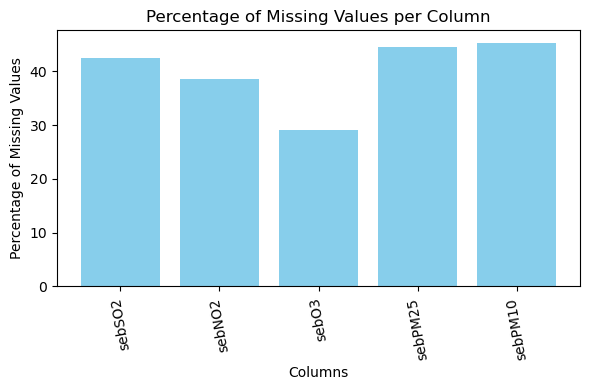

In [30]:
# Calculate the number of missing values per column
missing_percentage = dataset.isnull().sum()/ len(dataset) * 100

# Plotting the missing values
plt.figure(figsize=(6, 4))
plt.bar(missing_percentage.index, missing_percentage.values, color='skyblue')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=100)
plt.tight_layout()
plt.show()

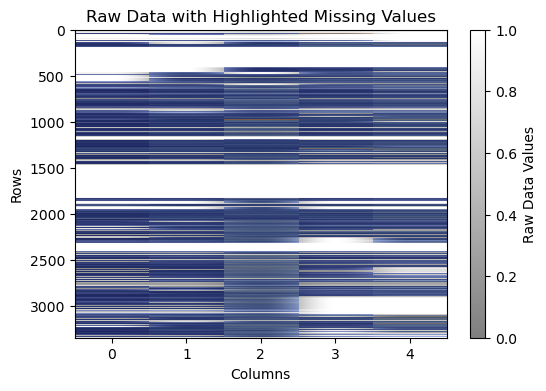

In [31]:
# Heatmap for missing data
plt.figure(figsize=(6, 4))
plt.imshow(dataset, aspect='auto', cmap='coolwarm', interpolation='none')

# Overlay missing data (highlight missing values in white)
plt.imshow(dataset.isnull(), cmap='gray', aspect='auto', alpha=0.5)

plt.colorbar(label='Raw Data Values')
plt.title('Raw Data with Highlighted Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [10]:
start_date = '2011-01-01'
end_date = '2020-02-27'

dataset['date'] = pd.date_range(start=start_date, end=end_date, freq='D')
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)

dataset.head(15)

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
date,,,,,
2011-01-01,NaN,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN,NaN
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN,NaN
2011-01-06,NaN,NaN,NaN,NaN,NaN
2011-01-07,NaN,NaN,NaN,NaN,NaN
2011-01-08,NaN,NaN,NaN,NaN,NaN
2011-01-09,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset.tail()

,sebSO2,sebNO2,sebO3,sebPM25,sebPM10
date,,,,,
2020-02-23,NaN,NaN,NaN,NaN,NaN
2020-02-24,NaN,NaN,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,23.932000,NaN,NaN
2020-02-27,NaN,NaN,22.543857,NaN,NaN


<Figure size 200x200 with 0 Axes>

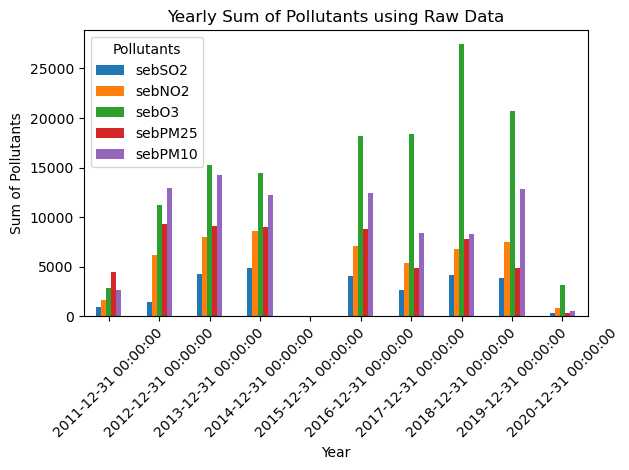

In [35]:
yearly_sum_raw = dataset.resample('YE').sum()

plt.figure(figsize=(2, 2))
yearly_sum_raw.plot(kind='bar')
plt.title('Yearly Sum of Pollutants using Raw Data')
plt.ylabel('Sum of Pollutants')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

In [16]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(dataset)

# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, index=dataset.index, columns=dataset.columns)


<Figure size 100x100 with 0 Axes>

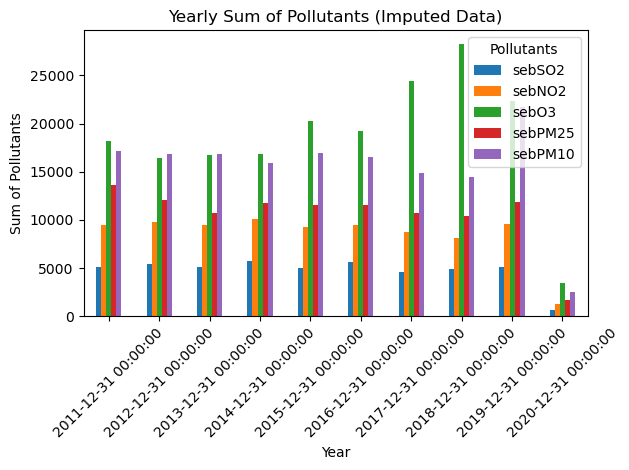

In [40]:
yearly_sum_imputed = df_imputed.resample('YE').sum()

plt.figure(figsize=(1, 1))
yearly_sum_imputed.plot(kind='bar')
plt.title('Yearly Sum of Pollutants (Imputed Data)')
plt.ylabel('Sum of Pollutants')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

